# Constant-Velocity, Constant-Acceleration (CV/CA)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import sys 
sys.path.append("/Users/thinhhoang/Documents/anomaly-detection-ngsim")
# sys.path.append("C:\\Users\\nxf67027\\Documents\\anomaly-detection-ngsim")
%matplotlib inline

# Load new data

In [4]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("../spherical-code-paper/trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
container_y_np = np.array(trajs['y_vec'])
container_t_np = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file
num_of_trajs = container_y_np.shape[0]

Text(0.5, 1.0, 'Y')

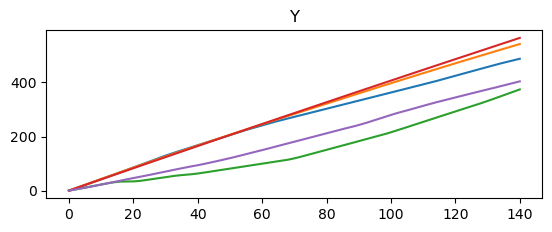

In [5]:
selected_indices_to_plot = np.random.choice(num_of_trajs, 5, replace=False)
plt.title('X')
plt.subplot(2, 1, 1)
for i in selected_indices_to_plot:
    plt.plot(container_y_np[i, :])
plt.title('Y')

# Broadcast Algorithm

In [6]:
def predict_next_position_cv(y0, v0, t0, t):
    return y0 + v0 * (t - t0) # assuming constant velocity

def predict_next_position_ca(y0, v0, a0, t0, t):
    return y0 + v0 * (t - t0) + 0.5 * a0 * (t - t0) ** 2 # assuming constant acceleration



# Test Set Preparation

In [7]:
# Compute the velocity and acceleration
container_v_np = np.diff(container_y_np, axis=1)
container_a_np = np.diff(container_v_np, axis=1)

print('Container Y shape:', container_y_np.shape)
print('Container V shape:', container_v_np.shape)
print('Container A shape:', container_a_np.shape)

Container Y shape: (200, 141)
Container V shape: (200, 140)
Container A shape: (200, 139)


In [8]:
# Sample test trajectories 

np.random.seed(6969)
test_trajectory_index = np.random.randint(num_of_trajs, size=100) # test set of 20 trajectories

In [9]:
container_y_np_test = container_y_np[test_trajectory_index, :]
container_v_np_test = container_v_np[test_trajectory_index, :]
container_a_np_test = container_a_np[test_trajectory_index, :]

# Benchmark Results

## Constant-Velocity

In [10]:
def test(y, v, a, eps=3, mode='cv'): # eps is ft
    time_of_broadcast = []
    time_since_last_broadcast = []
    last_y = y[0]
    last_v = v[0]
    last_a = a[0]
    last_t = 0
    for i in range(1, y.shape[0]-2):
        if mode == 'cv':
            y_pred = predict_next_position_cv(last_y, last_v, last_t, i)
        elif mode == 'ca':
            y_pred = predict_next_position_ca(last_y, last_v, last_a, last_t, i)
        if np.abs(y[i] - y_pred) > eps:
            time_of_broadcast.append(i)
            time_since_last_broadcast.append(i - last_t)
            last_y = y[i]
            last_v = v[i]
            last_a = a[i]
            last_t = i
    return time_of_broadcast, time_since_last_broadcast

In [11]:
times_of_broadcast_cv = [len(x) for x, z in [test(y, v, a, mode='cv') for y, v, a in zip(container_y_np_test, container_v_np_test, container_a_np_test)]]
times_between_broadcast_cv = [z for x, z in [test(y, v, a, mode='cv') for y, v, a in zip(container_y_np_test, container_v_np_test, container_a_np_test)]]

In [12]:
times_between_broadcast_cv = [item for sublist in times_between_broadcast_cv for item in sublist]

In [17]:
print('Avg broadcasts: ', np.average(times_of_broadcast_cv))
print('Std broadcasts: ', np.std(times_of_broadcast_cv))
print('Avg time between broadcasts: ', np.average(times_between_broadcast_cv))
print('Std time between broadcasts: ', np.std(times_between_broadcast_cv))

Avg broadcasts:  4.48
Std broadcasts:  1.4316424134538623
Avg time between broadcasts:  26.450892857142858
Std time between broadcasts:  14.289178569911082


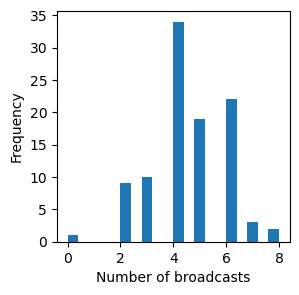

In [21]:
plt.figure(figsize=(3,3))
plt.hist(times_of_broadcast_cv, bins=20)
plt.xlabel('Number of broadcasts')
plt.ylabel('Frequency')
plt.savefig('cv_broadcasts.pdf', bbox_inches='tight')

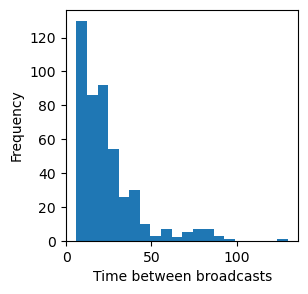

In [33]:
plt.figure(figsize=(3,3))
plt.hist(times_between_broadcast_cv, bins=20)
plt.xlabel('Time between broadcasts')
plt.ylabel('Frequency')
plt.savefig('cv_time_between.pdf', bbox_inches='tight')

## Constant-Acceleration

In [26]:
times_of_broadcast_ca = [len(x) for x, z in [test(y, v, a, mode='ca') for y, v, a in zip(container_y_np_test, container_v_np_test, container_a_np_test)]]
times_between_broadcast_ca = [z for x, z in [test(y, v, a, mode='ca') for y, v, a in zip(container_y_np_test, container_v_np_test, container_a_np_test)]]

In [27]:
times_between_broadcast_ca = [item for sublist in times_between_broadcast_ca for item in sublist]

In [28]:
avg_broadcasts = np.average(times_of_broadcast_ca)
std_broadcasts = np.std(times_of_broadcast_ca)

In [29]:
print('Avg broadcasts: ', np.average(times_of_broadcast_ca))
print('Std broadcasts: ', np.std(times_of_broadcast_ca))
print('Avg time between broadcasts: ', np.average(times_between_broadcast_ca))
print('Std time between broadcasts: ', np.std(times_between_broadcast_ca))

Avg broadcasts:  4.64
Std broadcasts:  2.590443977390748
Avg time between broadcasts:  24.099137931034484
Std time between broadcasts:  17.720619178923272


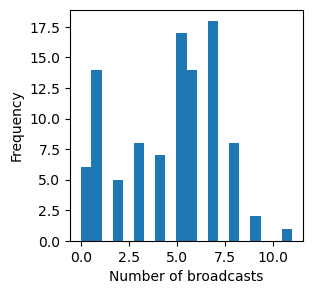

In [30]:
plt.figure(figsize=(3,3))
plt.hist(times_of_broadcast_cv, bins=20)
plt.xlabel('Number of broadcasts')
plt.ylabel('Frequency')
plt.savefig('ca_broadcasts.pdf', bbox_inches='tight')

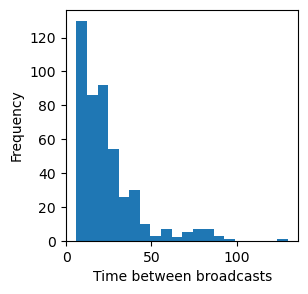

In [32]:
plt.figure(figsize=(3,3))
plt.hist(times_between_broadcast_ca, bins=20)
plt.xlabel('Time between broadcasts')
plt.ylabel('Frequency')
plt.savefig('ca_time_between_broadcasts.pdf', bbox_inches='tight')